<a href="https://colab.research.google.com/github/duhajarrar/TelecomMIT/blob/main/telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
###nibaaalll
#hamza
#raha
import pandas as pd
import numpy as np
trainingData = pd.read_csv("drive/MyDrive/Telecom.csv")


In [ ]:
trainingData.info()

In [ ]:
trainingData.head(10)

In [3]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
trainingData['state'] = label_encoder.fit_transform(trainingData['state'])
trainingData['international plan'] = label_encoder.fit_transform(trainingData['international plan'])
trainingData['voice mail plan'] = label_encoder.fit_transform(trainingData['voice mail plan'])
trainingData['churn'] = label_encoder.fit_transform(trainingData['churn'])
trainingData['phone number'] = trainingData['phone number'].str.replace(r'-','')
trainingData[['phone number']] = trainingData[['phone number']].apply(pd.to_numeric)


In [4]:
for i in range(len(trainingData.columns)):
  trainingData.rename(columns={trainingData.columns[i]: trainingData.columns[i].replace(r' ','_')}, inplace=True)

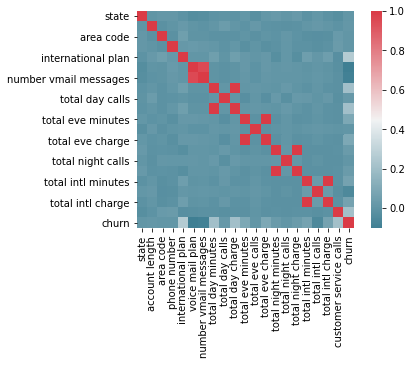

In [5]:
import seaborn as sns
corr = trainingData.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)

In [6]:
col=trainingData.columns
print(col)

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


Churn Percentage = 14.491449144914492


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


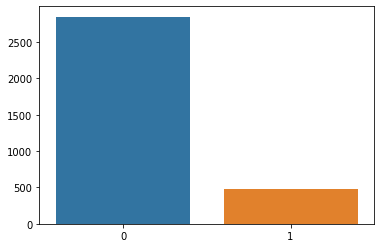

In [7]:
y = trainingData['churn'].value_counts()
sns.barplot(y.index, y.values)
y_True = trainingData["churn"][trainingData["churn"] == True]
print ("Churn Percentage = "+str( (y_True.shape[0] / trainingData["churn"].shape[0]) * 100 ))

In [8]:
trainingData.describe()

state  account length  ...  customer service calls        churn
count  3333.000000     3333.000000  ...             3333.000000  3333.000000
mean     26.059406      101.064806  ...                1.562856     0.144914
std      14.824911       39.822106  ...                1.315491     0.352067
min       0.000000        1.000000  ...                0.000000     0.000000
25%      14.000000       74.000000  ...                1.000000     0.000000
50%      26.000000      101.000000  ...                1.000000     0.000000
75%      39.000000      127.000000  ...                2.000000     0.000000
max      50.000000      243.000000  ...                9.000000     1.000000

[8 rows x 21 columns]

international plan


(array([346.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 137.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

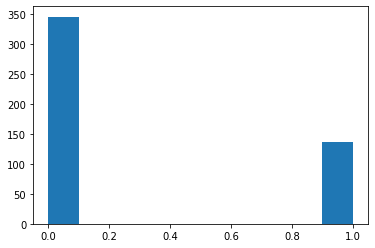

In [9]:
from matplotlib.pyplot import hist
print(col[4])
hist(trainingData[col[4]],weights=trainingData['churn'])

area code


(array([358.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 125.]),
 array([408. , 418.2, 428.4, 438.6, 448.8, 459. , 469.2, 479.4, 489.6,
        499.8, 510. ]),
 <a list of 10 Patch objects>)

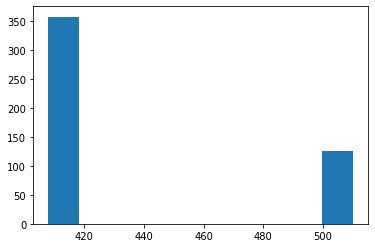

In [10]:
from matplotlib.pyplot import hist
print(col[2])
hist(trainingData[col[2]],weights=trainingData['churn'])

total day minutes


(array([  1.,   9.,  21.,  67.,  87.,  45.,  84., 100.,  49.,  20.]),
 array([  0.  ,  35.08,  70.16, 105.24, 140.32, 175.4 , 210.48, 245.56,
        280.64, 315.72, 350.8 ]),
 <a list of 10 Patch objects>)

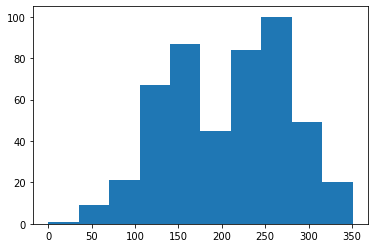

In [11]:
from matplotlib.pyplot import hist
print(col[7])
hist(trainingData[col[7]],weights=trainingData['churn'])

total day charge


(array([  1.,   9.,  21.,  67.,  87.,  45.,  84., 100.,  49.,  20.]),
 array([ 0.   ,  5.964, 11.928, 17.892, 23.856, 29.82 , 35.784, 41.748,
        47.712, 53.676, 59.64 ]),
 <a list of 10 Patch objects>)

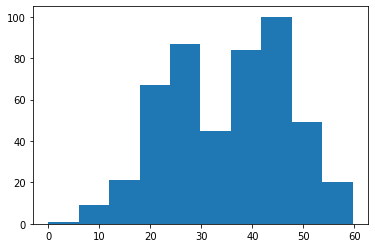

In [12]:
from matplotlib.pyplot import hist
print(col[9])
hist(trainingData[col[9]],weights=trainingData['churn'])

customer service calls


(array([ 92., 122.,  87.,  44.,  76.,  40.,  14.,   5.,   1.,   2.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

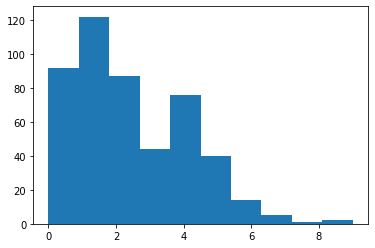

In [13]:
from matplotlib.pyplot import hist
print(col[19])
hist(trainingData[col[19]],weights=trainingData['churn'])

# **Deep Neural Network**

In [5]:
%tensorflow_version 2.x

import tensorflow as tf

In [6]:
y=trainingData['churn']
x = trainingData
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1)
train = x_train.pop('churn')
test = x_test.pop('churn')
print(len(x))
print(len(x_train))
print(len(x_test))

3333
2999
334


In [17]:
x_train.shape

(2999, 20)

In [18]:
x_test.shape

(334, 20)

In [7]:
def input_fn(features, labels, training=True, batch_size=256):
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle and repeat if you are in training mode.
    if training:
        dataset = dataset.shuffle(1000).repeat()
        
    return dataset.batch(batch_size)

In [8]:
my_feature_columns = []
for key in x_train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))
print(my_feature_columns)

[NumericColumn(key='state', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='account_length', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='area_code', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='phone_number', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='international_plan', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='voice_mail_plan', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='number_vmail_messages', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='total_day_minutes', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='total_day_calls', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='total_day_charge'

In [15]:
# Build a DNN with 2 hidden layers with 30 and 10 hidden nodes each.
classifier = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    # Two hidden layers of 30 and 10 nodes respectively.
    hidden_units=[30, 10],
    #hidden_units=[256,128,64,32],
    # The model must choose between 3 classes.
    n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp59puviyz', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [16]:
classifier.train(
    input_fn=lambda: input_fn(x_train, train, training=True),steps=5000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp59puviyz/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 146587.0, step = 0
INFO:tensorflow:global_step/sec: 309.227
INFO:tensorflow:loss = 101135.5, step = 100 (0.326 sec)
INFO:tensorflow:global_step/sec: 398.149
INFO:tensorflow:loss = 40363.88, step = 200 (0.250 sec)
INFO:tensorflow:global_step/sec: 386.112
INFO:tensorflow:loss = 28440.594, step = 300 (0.260 sec)
INFO:tensorflow:global_step/sec: 369.678
INFO:tensorflow:loss = 8248.898, step = 400 (0.270 sec)
INFO:tensorflow:global_step/sec: 366.209
INFO:tensorflow:loss = 555.7626, step = 500 (0.273 sec)
INFO:tensor

In [17]:
eval_result = classifier.evaluate(
    input_fn=lambda: input_fn(x_test, test, training=False))

print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-12-19T19:40:34Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp59puviyz/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.36562s
INFO:tensorflow:Finished evaluation at 2020-12-19-19:40:34
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.8502994, accuracy_baseline = 0.8502994, auc = 0.5, auc_precision_recall = 0.1497006, average_loss = 54.21727, global_step = 5000, label/mean = 0.1497006, loss = 55.972374, precision = 0.0, prediction/mean = 0.0, recall = 0.0
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: /tmp/tmp59puviyz/model.ckpt-5000

Test set accuracy: 0.850

